## trail classification

In [ ]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

hello = tf.constant("Hello, TensorFlow!")

print(hello.numpy())


TensorFlow version: 2.19.0
b'Hello, TensorFlow!'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=['good','great','well done','wonderful','bad','not good','dislike','useless']
label =[1,1,1,1,0,0,0,0]

In [ ]:
one_hot =[tf.keras.preprocessing.text.one_hot(d,50) for d in data]
print(one_hot)

[[42], [45], [13, 39], [1], [32], [26, 42], [3], [10]]


In [ ]:
padding_of_x=tf.keras.preprocessing.sequence.pad_sequences(one_hot,padding='pre',maxlen=2)
print(padding_of_x)

[[ 0 42]
 [ 0 45]
 [13 39]
 [ 0  1]
 [ 0 32]
 [26 42]
 [ 0  3]
 [ 0 10]]


In [ ]:
emb_layer=tf.keras.layers.Embedding(50,4,input_length=4)
emb_layer(padding_of_x)

<tf.Tensor: shape=(8, 2, 4), dtype=float32, numpy=
array([[[ 0.0137887 , -0.04654501, -0.02324556, -0.02691884],
        [ 0.01292462,  0.03446451, -0.00158464,  0.03526919]],

       [[ 0.0137887 , -0.04654501, -0.02324556, -0.02691884],
        [ 0.0031713 , -0.0215937 , -0.00392292,  0.02367521]],

       [[-0.02468616, -0.04447926, -0.01950792,  0.04550517],
        [-0.01186254,  0.02337665, -0.04526126, -0.02551766]],

       [[ 0.0137887 , -0.04654501, -0.02324556, -0.02691884],
        [-0.02801906, -0.00492294, -0.009409  , -0.02918356]],

       [[ 0.0137887 , -0.04654501, -0.02324556, -0.02691884],
        [-0.04585576,  0.04260856, -0.01909999, -0.0242115 ]],

       [[ 0.00110346, -0.02702031,  0.0330932 ,  0.03663177],
        [ 0.01292462,  0.03446451, -0.00158464,  0.03526919]],

       [[ 0.0137887 , -0.04654501, -0.02324556, -0.02691884],
        [-0.00462344, -0.024421  , -0.03775215,  0.02087429]],

       [[ 0.0137887 , -0.04654501, -0.02324556, -0.02691884],
     

In [ ]:
model=tf.keras.Sequential()
model.add(emb_layer)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ (8, 2, 4)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200 (800.00 B)

 Trainable params: 200 (800.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(tf.convert_to_tensor(padding_of_x), tf.convert_to_tensor(label), epochs=100,verbose=0,batch_size=2)

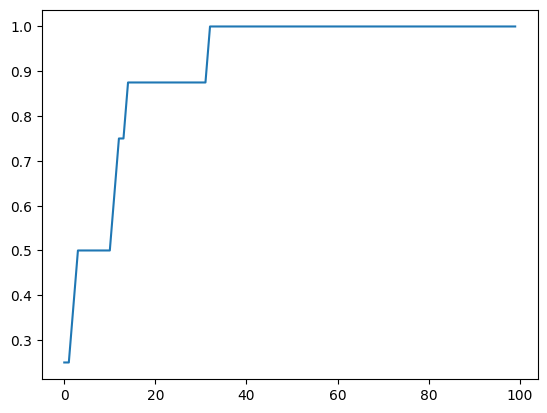

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
def predict_word(word):
  one_hot_word=[tf.keras.preprocessing.text.one_hot(word,50)]
  padded_word=tf.keras.preprocessing.sequence.pad_sequences(one_hot_word,padding='pre',maxlen=2)
  result=model.predict(padded_word)
  if result[0][0]>0.5:
    print('positive')
  else:
    print('negative')

In [ ]:
predict_word(word="good positive")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
negative


## Install tensorflow and pdfplumber

In [ ]:
pip install tensorflow

In [ ]:
pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 35.4 MB/s eta 0:00:00


## Text Classification


Classify the input reports to find the lab results (final results) or other. binary classification using tensorflow classification model as pagewise classification.

start with data processing page number with paragraph json.

then label the data for train dataset: if lab results or
(final results) in para then label as lab results and if not found label as others.

one hot encodding to convert word o ector representation

padding to bring all the text to scaled level

model train with first layer with embedding to give meaning to the input text

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pdfplumber

In [ ]:
path =r'/content/AI_11_ISC_2_1.pdf'

### Text Extraction and labeled the data

In [ ]:
def extract_text(pdf_path: str):
    results = []
    try:
        with pdfplumber.open(pdf_path) as pdf:
            for page in pdf.pages:
                page_text = page.extract_text() or ""
                results.append({
                    "page": page.page_number,
                    "para": page_text.replace("\n", " ").strip()
                })
        return results
    except Exception as e:
      print(e)

In [ ]:
df=extract_text(path)
print(df)

[{'page': 1, 'para': 'OLSC PRV PRIMARY CARE Melvin, William F 1541 Kings Hwy MRN: 14458325, DOB: 9/24/1948, Legal Sex: M SHREVEPORT LA 71103-4228 Acct #: 28009157410 Enc. Date 10/9/2024 10/09/2024 - Office Visit in Shreveport-Provenance Primary Care Diagnoses Codes Comments Hyperlipidemia, unspecified hyperlipidemia type - Primary ICD-10-CM: E78.5 ICD-9-CM: 272.4 Type 2 diabetes mellitus with diabetic microalbuminuria, without long-term ICD-10-CM: E11.29, current use of insulin R80.9 ICD-9-CM: 250.40, 791.0 Problem List as of 10/9/2024 Date Reviewed: 4/9/2024 Codes Priority Class Noted - Resolved History of herpes zoster ICD-10-CM: Z86.19 12/31/1977 - ICD-9-CM: V12.09 Present Type 2 diabetes mellitus ICD-10-CM: E11.9 1/1/1999 - Present ICD-9-CM: 250.00 History of colonic polyps ICD-10-CM: Z86.0100 12/31/2013 - ICD-9-CM: V12.72 Present Overview Signed 7/3/2023 8:12 AM by Callegan-Poche, Amanda L., MD Removal Reason: removed Lipoma of forearm ICD-10-CM: D17.20 10/1/2016 - ICD-9-CM: 214.1

In [ ]:
import re

def label_text(data_list):
  labeled_data = []
  for item in data_list:
    page_no = item["page"]
    para_text = item["para"]
    para_text_lower = para_text.lower()

    if "lab results" in para_text_lower or "(final result)" in para_text_lower:
      labeled_data.append({"page": page_no, "text": para_text, "label": "yes"})
    else:
      labeled_data.append({"page": page_no, "text": para_text, "label": "others"})
  return labeled_data

In [ ]:
le=label_text(df)
print(le)

[{'page': 1, 'text': 'OLSC PRV PRIMARY CARE Melvin, William F 1541 Kings Hwy MRN: 14458325, DOB: 9/24/1948, Legal Sex: M SHREVEPORT LA 71103-4228 Acct #: 28009157410 Enc. Date 10/9/2024 10/09/2024 - Office Visit in Shreveport-Provenance Primary Care Diagnoses Codes Comments Hyperlipidemia, unspecified hyperlipidemia type - Primary ICD-10-CM: E78.5 ICD-9-CM: 272.4 Type 2 diabetes mellitus with diabetic microalbuminuria, without long-term ICD-10-CM: E11.29, current use of insulin R80.9 ICD-9-CM: 250.40, 791.0 Problem List as of 10/9/2024 Date Reviewed: 4/9/2024 Codes Priority Class Noted - Resolved History of herpes zoster ICD-10-CM: Z86.19 12/31/1977 - ICD-9-CM: V12.09 Present Type 2 diabetes mellitus ICD-10-CM: E11.9 1/1/1999 - Present ICD-9-CM: 250.00 History of colonic polyps ICD-10-CM: Z86.0100 12/31/2013 - ICD-9-CM: V12.72 Present Overview Signed 7/3/2023 8:12 AM by Callegan-Poche, Amanda L., MD Removal Reason: removed Lipoma of forearm ICD-10-CM: D17.20 10/1/2016 - ICD-9-CM: 214.1

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(le, test_size=0.2, random_state=42)

In [ ]:
f=[d['page'] for d in train]
print(f)

[9, 6, 3, 2, 12, 5, 8, 4, 7]


In [ ]:
balance_train= [d for d in train if d['label'] == 'yes']
balance_train += [d for d in train if d['label'] == 'others'][:len(balance_train)]
print(balance_train)

[{'page': 9, 'text': 'OLSC PRV PRIMARY CARE Melvin, William F 1541 Kings Hwy MRN: 14458325, DOB: 9/24/1948, Legal Sex: M SHREVEPORT LA 71103-4228 Acct #: 28009157410 Enc. Date 10/9/2024 Labs (continued) Testing Performed By Lab - Abbreviation Name Director Address Valid Date Range 650 - SHVRT OCHSNER LSU Unknown 1541 Kings Hwy 04/27/23 0824 - Present HEALTH SHREVEPORT LA SHREVEPORT 71103 Indications Type 2 diabetes mellitus with diabetic microalbuminuria, without long-term current use of insulin [E11.29, R80.9 (ICD-10-CM)] CBC Auto Differential [1096741733] (Final result) Electronically signed by: Callegan-Poche, Amanda L., MD on 10/09/24 0834 Status: Completed Ordering user: Callegan-Poche, Amanda L., MD 10/09/24 0834 Authorized by: Callegan-Poche, Amanda L., MD Ordering mode: Standard Frequency: Routine 10/09/24 - Class: Clinic Collect Quantity: 1 Lab status: Final result Diagnoses Type 2 diabetes mellitus with diabetic microalbuminuria, without long-term current use of insulin [E11.

one hot encodding

In [ ]:
one_hot =[tf.keras.preprocessing.text.one_hot(d['text'],50) for d in balance_train]
print(one_hot)
label_str=[d['label'] for d in balance_train]
label=[1 if l == 'yes' else 0 for l in label_str]
print(label)

[[23, 37, 24, 34, 20, 43, 30, 15, 3, 18, 30, 6, 14, 11, 27, 21, 25, 1, 40, 23, 1, 21, 25, 42, 35, 3, 38, 10, 11, 9, 12, 48, 34, 41, 25, 25, 1, 10, 6, 10, 33, 38, 4, 27, 10, 2, 7, 22, 15, 3, 18, 29, 46, 40, 45, 6, 39, 23, 1, 23, 21, 43, 45, 41, 47, 35, 3, 29, 11, 24, 21, 28, 36, 37, 43, 22, 10, 23, 43, 11, 1, 10, 3, 44, 46, 39, 22, 18, 27, 10, 15, 25, 46, 49, 20, 5, 9, 40, 10, 39, 27, 47, 34, 8, 29, 7, 46, 49, 20, 5, 9, 10, 39, 27, 47, 16, 25, 46, 49, 20, 5, 9, 29, 44, 37, 38, 6, 10, 39, 27, 21, 23, 9, 47, 34, 25, 34, 18, 27, 13, 45, 41, 47, 35, 3, 29, 11, 24, 21, 28, 36, 37, 43, 22, 10, 23, 43, 11, 32, 44, 8, 45, 7, 29, 25, 22, 48, 48, 10, 39, 27, 37, 43, 44, 46, 39, 22, 44, 3, 39, 44, 3, 11, 10, 39, 27, 19, 27, 34, 18, 27, 12, 34, 8, 7, 25, 25, 16, 7, 10, 39, 27, 19, 29, 25, 1, 17, 44, 10, 39, 27, 37, 24, 25, 2, 7, 39, 23, 21, 14, 48, 32, 4, 20, 25, 10, 10, 45, 39, 48, 45, 32, 15, 19, 44, 10, 38, 22, 4, 13, 7, 41, 8, 40, 19, 44, 10, 10, 26, 41, 45, 22, 39, 39, 36, 25, 44, 10, 37, 22, 

In [ ]:
padding_of_x=[]
padding_of_x=tf.keras.preprocessing.sequence.pad_sequences(one_hot,maxlen=12,padding='post')
print(padding_of_x)

[[38 10 33 40 10 29 27 18 12 46 20 11]
 [ 6 39 33 40 10 29 27 18 12 46 20 41]
 [16 25 33 40 10 29 27 18 12 46 20 10]
 [10  3 33 40 10 29 27 18 12 46 20 21]
 [ 3 19 33 40 10 29 27 18 12 46 20 39]
 [37 48 33 40 10 29 27 18 12 46 20 41]
 [43 44 33 40 10 29 27 18 12 46 20 45]
 [29 12 33 40 10 29 27 18 12 46 20 22]]


In [ ]:

model=tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=500,output_dim=64))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.build(input_shape=(None, 12))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 12, 64)         │        32,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           769 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,769 (128.00 KB)

 Trainable params: 32,769 (128.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(tf.convert_to_tensor(padding_of_x), tf.convert_to_tensor(label), epochs=10,verbose=1,batch_size=2)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7333 - loss: 0.7005 
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4500 - loss: 0.6997 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5833 - loss: 0.6757 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6500 - loss: 0.6607 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5833 - loss: 0.6637 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7667 - loss: 0.6628 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.6470 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.6422 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.6254 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.6270


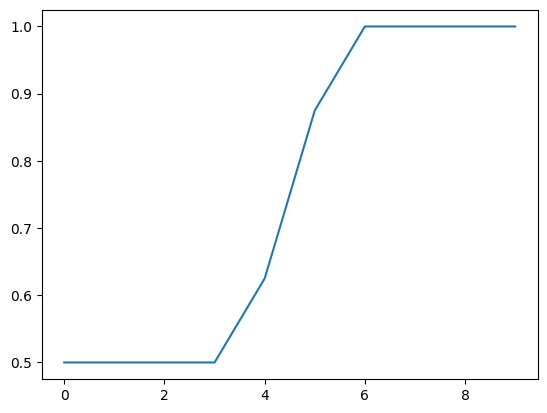

In [ ]:
plt.plot(history.history['accuracy'])

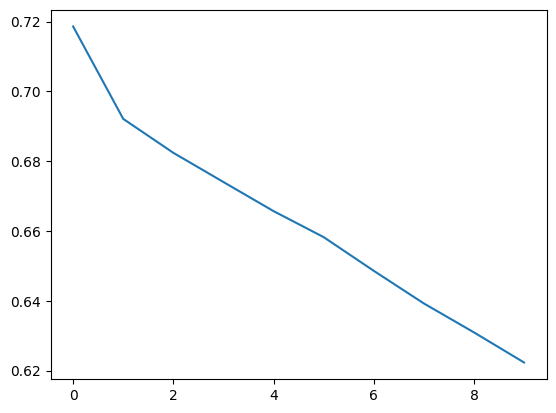

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
#predict_word="Lab Results Component Value Date HGBA1C 8.1 (H) 04/08/2024"

test_texts = [d['text'] for d in test]
test_labels = [d['label'] for d in test]
test_label = [1 if l == 'yes' else 0 for l in test_labels]
test_one_hot=[tf.keras.preprocessing.text.one_hot(text,50) for text in test_texts]
test_padding=tf.keras.preprocessing.sequence.pad_sequences(test_one_hot,padding='post',maxlen=12)
testing=model.predict(test_padding)

print(testing)
s=[d['label'] for d in test]
print(s)
result={"page":s,"label":[test for i,test in enumerate(testing)]}
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[0.52098435]
 [0.5060628 ]
 [0.5075059 ]]
['others', 'yes', 'others']
{'page': ['others', 'yes', 'others'], 'label': [array([0.52098435], dtype=float32), array([0.5060628], dtype=float32), array([0.5075059], dtype=float32)]}


In [ ]:
loss, accuracy = model.evaluate(test_padding, tf.convert_to_tensor(test_label))
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.3333 - loss: 0.7085
Test Accuracy: 33.33%


# function for dataset collection

## synthetic data creation

In [ ]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.4 MB/s eta 0:00:00


In [ ]:
import random
from faker import Faker

In [ ]:
fake = Faker()

def generate_synthetic_data(num_records=10):
    lab_keywords = ["Lab Results","Lab Results","Lab Results","Lab Results","Lab Results","Lab Results","Lab Results","Lab Results","Lab Results"]

    data = []

    for i in range(1, num_records + 1):
        has_lab_results = random.choice([True, False])
        if has_lab_results:
            keyword = random.choice(lab_keywords)
            text = f"{fake.paragraph()} The {keyword} is {random.randint(50, 200)}."
            label = [1 if "lab results" in text.lower() else 0][0]
        else:
            text = fake.paragraph()
            label = [1 if "lab results" in text.lower() else 0][0]
        data.append({
            "pageno": i,
            "para": text,
            "label": label
        })

    return data

# Example usage
if __name__ == "__main__":
    synthetic_dataset = generate_synthetic_data(5000)
    for record in synthetic_dataset:
        print(record)


{'pageno': 1, 'para': 'Former hit anyone smile result item couple. Red economic identify rate. The Lab Results is 64.', 'label': 1}
{'pageno': 2, 'para': 'Help story class sometimes TV around discover. Dog or machine ground. Perform political way beautiful meeting. The Lab Results is 170.', 'label': 1}
{'pageno': 3, 'para': 'Enough international whole cultural do. Break become cause traditional occur throughout street. Age turn month.', 'label': 0}
{'pageno': 4, 'para': 'Truth million tend both. Exactly religious event American help perhaps situation. The Lab Results is 62.', 'label': 1}
{'pageno': 5, 'para': 'Line sing smile other field. Source response day over major democratic product. Protect conference sell. The Lab Results is 51.', 'label': 1}
{'pageno': 6, 'para': 'Door remember glass anyone. Notice soon more thousand week. Activity space station.', 'label': 0}
{'pageno': 7, 'para': 'Mission whatever available method woman approach approach.', 'label': 0}
{'pageno': 8, 'para': '

In [ ]:
count = sum(record['label'] for record in synthetic_dataset)
print(count)

2449


## Standardize and Combine Datasets


In [ ]:
transformed_le_data = []
for item in le:
    new_item = {
        "pageno": item["page"],
        "para": item["text"],
        "label": 1 if item["label"] == "yes" else 0
    }
    transformed_le_data.append(new_item)

synthetic_dataset.extend(transformed_le_data)

print(f"Total records in combined dataset: {len(synthetic_dataset)}")

Total records in combined dataset: 5024


In [ ]:
balance_train= [d for d in synthetic_dataset if d['label'] == 1]
balance_train += [d for d in synthetic_dataset if d['label'] == 0][:len(balance_train)]
count = sum(record['label'] for record in balance_train)
print(count)

2459


In [ ]:
label_str = [d['label'] for d in balance_train]
X_train, X_test, y_train, y_test = train_test_split(balance_train, label_str, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_texts = [d['para'] for d in X_train]
X_test_texts = [d['para'] for d in X_test]

# One-hot encode
X_train_one_hot = [tf.keras.preprocessing.text.one_hot(text, 50) for text in X_train_texts]
X_test_one_hot = [tf.keras.preprocessing.text.one_hot(text, 50) for text in X_test_texts]
max_len = 12

train_seq_padded = pad_sequences(X_train_one_hot, maxlen=max_len, padding='post')
test_seq_padded = pad_sequences(X_test_one_hot, maxlen=max_len, padding='post')

# The y_train and y_test are already lists of numerical labels
# They do not need further processing here for padding.

print("Train padded shapes:", train_seq_padded.shape)
print("Test padded shapes:", test_seq_padded.shape)
print("y_train length:", len(y_train))
print("y_test length:", len(y_test))

Train padded shapes: (3934, 12)
Test padded shapes: (984, 12)
y_train length: 3934
y_test length: 984


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(50, 64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
 ])
model.build(input_shape=(None, 12))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 12, 64)         │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           769 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,969 (15.50 KB)

 Trainable params: 3,969 (15.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) # Added model.compile()
history=model.fit(train_seq_padded,tf.convert_to_tensor(y_train), epochs=50 ,validation_split= 0.2,verbose=1,batch_size=2)

Epoch 1/50
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9319 - loss: 0.2446 - val_accuracy: 0.9962 - val_loss: 0.0169
Epoch 2/50
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9967 - loss: 0.0132 - val_accuracy: 1.0000 - val_loss: 0.0067
Epoch 3/50
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9990 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 4/50
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 5/50
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9987 - val_loss: 0.0026
Epoch 6/50
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 1.0000 - loss: 4.6000e-04 - val_accuracy: 0.9987 - val_loss: 0.0019
Epoch 7/50
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 1.0000 - loss: 1.9870e-04 - val_accuracy: 0.9987 - val_loss: 0.0020
Epoch 8/50
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 1.0000 - loss: 1

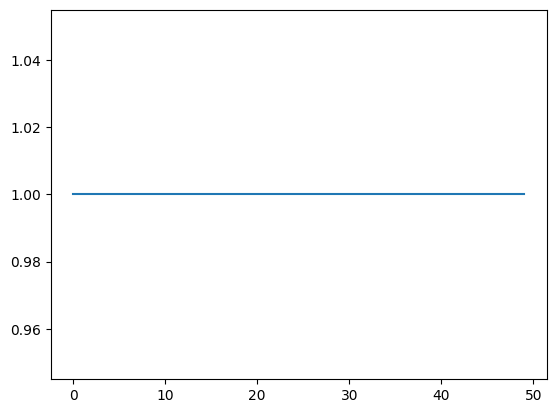

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
test_texts = [d['para'] for d in X_test]
test_label = y_test
test_one_hot=[tf.keras.preprocessing.text.one_hot(text,50) for text in test_texts]
test_padding=tf.keras.preprocessing.sequence.pad_sequences(test_one_hot,padding='post',maxlen=12)

In [ ]:
loss, accuracy = model.evaluate(test_padding, tf.convert_to_tensor(test_label))
print(f"Test Accuracy: {accuracy * 100:.2f}%")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9948 - loss: 0.0077
Test Accuracy: 99.80%


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


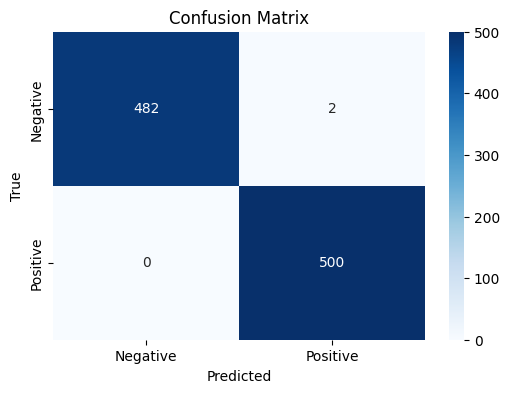

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


y_pred_probs = model.predict(test_padding)
y_pred_labels = (y_pred_probs > 0.5).astype(int)
true_labels = np.array(test_label)
cm = confusion_matrix(true_labels, y_pred_labels)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Exploring model layers

In [ ]:
path='/content/file.json'

In [ ]:
import json

with open(path, 'r') as f:
    data = json.load(f)
print(data)

[{'filename': '975800', 'text': ' 5634217289 Genesis 13:12:51 09_19-2025 10 /39 Genesis Health System Patient Name: VOGEL, BRENT M FIN#: 4001878638 DeWitt Community Hospital CMRN#: 948632 MRN: DO0000765278 1118 11th Street DOB: 8/21/1971 Phone: 5632495518 DeWitt;, IA 52742- Birth Sex: Male Type: Outpatient Med Svc: Lab Specimen IA Receiving: Brown, Tassy L Chemistries (A) Abnormal Critical ^ = Interpretive Data c = Corrected Results L =Low H High Collected Date = 512212024 Collected Time= 45.06 CDT Test Units Ref Range ISodium 140 mmollL [134-144] Potassium 5.0 mmollL [3.5-5.2] Chloride 101 mmollL [97-108] Icoz 25 mmol/L [18-29] IAnion 14 mmollL [5-19] Glucose 701 % ImgldL [65-99] BUN 20 mgldL [6-24] [Creatinine 0.95 mgldL [0.76-1.27] Bun/Crea 27 " Ratio [[6-20] leGFR 96 mLIminl1.73 m2 [=59] ICalc Osmo 283 [273-304] ALT 30 IInternational UnitsIL [[0-44] AST 23 IInternational UnitsIL [0-40] Alkaline phosphatase 66 UnitsIL [39-117] Bilirubin Total 1.1 ImgldL [0.0-1.2] Total Protein 7.6 I

In [ ]:
# synthetic data + file.json
transformed_le_data = []
for item in data:
    new_item = {
        "pageno": item["filename"],
        "para": item["text"],
        "label": item["label"]
    }
    transformed_le_data.append(new_item)

synthetic_dataset.extend(transformed_le_data)

print(f"Total records in combined dataset: {len(synthetic_dataset)}")

Total records in combined dataset: 8330


In [ ]:
balance_train= [d for d in synthetic_dataset if d['label'] == 1]
balance_train += [d for d in synthetic_dataset if d['label'] == 0][:len(balance_train)]
count = sum(record['label'] for record in balance_train)
print(count)
label_str = [d['label'] for d in balance_train]

3164


In [ ]:
# remove duplicates
unique_data = []
for item in balance_train:
    if item not in unique_data:
        unique_data.append(item)

In [ ]:
label_str = [d['label'] for d in unique_data]
X_train, X_test, y_train, y_test = train_test_split(unique_data, label_str, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_texts = [d['para'] for d in X_train]
X_test_texts = [d['para'] for d in X_test]

# One-hot encode
X_train_one_hot = [tf.keras.preprocessing.text.one_hot(text, 50) for text in X_train_texts]
X_test_one_hot = [tf.keras.preprocessing.text.one_hot(text, 50) for text in X_test_texts]
max_len = 12

train_seq_padded = pad_sequences(X_train_one_hot, maxlen=max_len, padding='post')
test_seq_padded = pad_sequences(X_test_one_hot, maxlen=max_len, padding='post')

# The y_train and y_test are already lists of numerical labels
# They do not need further processing here for padding.

print("Train padded shapes:", train_seq_padded.shape)
print("Test padded shapes:", test_seq_padded.shape)
print("y_train length:", len(y_train))
print("y_test length:", len(y_test))

Train padded shapes: (4676, 12)
Test padded shapes: (1170, 12)
y_train length: 4676
y_test length: 1170


In [ ]:
import tensorflow as tf
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping

model1=tf.keras.models.Sequential([
    layers.Embedding(50,128),
    layers.Bidirectional(layers.LSTM(64,return_sequences=True)),
    layers.Dense(16,activation='relu'),
    layers.Dense(8,activation='relu'),
    layers.Flatten(),
    layers.Dense(1,activation='sigmoid')
])
model1.build(input_shape=(None,12))
model1.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_27 (Embedding)        │ (None, 12, 128)        │         6,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_13                │ (None, 12, 128)        │        98,816 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 12, 16)         │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 12, 8)          │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,513 (419.97 KB)

 Trainable params: 107,513 (419.97 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model1.fit(train_seq_padded,tf.convert_to_tensor(y_train), epochs=50 ,validation_split= 0.2,verbose=1,batch_size=2,callbacks=early_stopping)

Epoch 1/50
1870/1870 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.9367 - loss: 0.2089 - val_accuracy: 0.9701 - val_loss: 0.0863
Epoch 2/50
1870/1870 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9668 - loss: 0.0759 - val_accuracy: 0.9712 - val_loss: 0.0780
Epoch 3/50
1870/1870 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9730 - loss: 0.0612 - val_accuracy: 0.9722 - val_loss: 0.0730
Epoch 4/50
1870/1870 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9798 - loss: 0.0440 - val_accuracy: 0.9776 - val_loss: 0.0694
Epoch 5/50
1870/1870 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9825 - loss: 0.0437 - val_accuracy: 0.9679 - val_loss: 0.0920
Epoch 6/50
1870/1870 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9827 - loss: 0.0463 - val_accuracy: 0.9722 - val_loss: 0.0869
Epoch 7/50
1870/1870 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - accuracy: 0.9862 - loss: 0.0284 - val_accuracy: 0.9712 - val_loss: 0.0818
Epoch 8/50
1870/1870 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9875 -

In [ ]:
test_texts = [d['para'] for d in X_test]
test_label = y_test
test_one_hot=[tf.keras.preprocessing.text.one_hot(text,50) for text in test_texts]
test_padding=tf.keras.preprocessing.sequence.pad_sequences(test_one_hot,padding='post',maxlen=12)

In [ ]:
loss, accuracy = model1.evaluate(test_padding, tf.convert_to_tensor(test_label))
print(f"Test Accuracy: {accuracy * 100:.2f}%")

37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9716 - loss: 0.0804
Test Accuracy: 96.84%


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


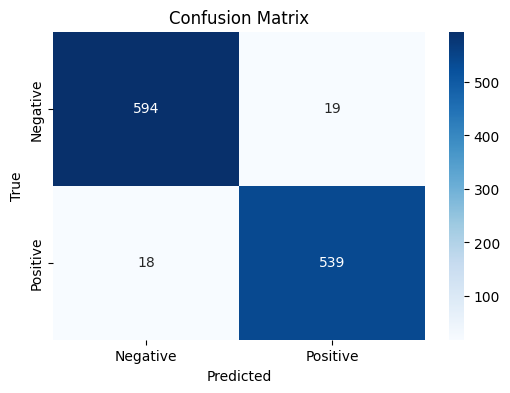

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


y_pred_probs = model1.predict(test_padding)
y_pred_labels = (y_pred_probs > 0.5).astype(int)
true_labels = np.array(test_label)
cm = confusion_matrix(true_labels, y_pred_labels)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model1, file)